## 01. Import Libraries

In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 02. Import Data

In [4]:
#define path
path = r'/Users/piperdutcher/Documents/Achievement 4/04-2024 Instacart Basket Analysis'

In [5]:
# Import Data Set - Customers:
df_customers = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'customers.csv'), index_col = False)

In [6]:
# Import Rest of Instacart Data
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'new_orders_products_w_flags.pkl'))

## 03. Wrangle / Clean Customer Data

In [7]:
# check data:
df_customers.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [8]:
# column names have some inconsistencies / typos that will need to be fixed
# need to change user_id to string, check for duplicates

In [9]:
# rename Surnam to surname
df_customers.rename(columns = {'Surnam' : 'surname'}, inplace = True)

In [10]:
# rename n_dependants to num_of_dependents
df_customers.rename(columns = {'n_dependants' : 'num_of_dependents'}, inplace = True)

In [11]:
# checking for duplicate states

df_customers['STATE'].value_counts().sort_index()

STATE
Alabama                 4044
Alaska                  4044
Arizona                 4044
Arkansas                4044
California              4044
Colorado                4044
Connecticut             4044
Delaware                4044
District of Columbia    4044
Florida                 4044
Georgia                 4044
Hawaii                  4044
Idaho                   4044
Illinois                4044
Indiana                 4044
Iowa                    4044
Kansas                  4043
Kentucky                4043
Louisiana               4043
Maine                   4043
Maryland                4043
Massachusetts           4043
Michigan                4043
Minnesota               4043
Mississippi             4043
Missouri                4043
Montana                 4043
Nebraska                4043
Nevada                  4043
New Hampshire           4043
New Jersey              4043
New Mexico              4043
New York                4043
North Carolina          4043
North Da

In [12]:
# there are only 50 states entered which means there are no duplicate states.
# some states appaear to have an additional entry, might require additional investigation:
# Florida, Colorado, Illinois, Alabama, DC, Hawaii, Arizona, Connecticut, California, Indiana, Arkansas, Alaska, Delaware, Iowa, Idaho, Georgia

In [13]:
df_customers.rename(columns = {'First Name' : 'first_name'}, inplace = True)

In [14]:
df_customers.head()

,user_id,first_name,surname,Gender,STATE,Age,date_joined,num_of_dependents,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [15]:
df_customers.rename(columns = {'Gender' : 'gender'}, inplace = True)
df_customers.rename(columns = {'Age' : 'age'}, inplace = True)
df_customers.rename(columns = {'STATE' : 'state'}, inplace = True)

In [15]:
df_customers.head()

,user_id,first_name,surname,gender,state,age,date_joined,num_of_dependents,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [17]:
df_customers.shape

(206209, 10)

In [16]:
# all columns have been renamed to be cohesive and consistent with our other data set
# checking data types for all columns:
df_customers.dtypes

user_id               int64
first_name           object
surname              object
gender               object
state                object
age                   int64
date_joined          object
num_of_dependents     int64
fam_status           object
income                int64
dtype: object

In [17]:
# will need to change user_id to string
# first_name to string
# surname to string
# gender to string
# state to string
# fam_status to string

In [18]:
df_customers['user_id'] = df_customers['user_id'].astype('str')
df_customers['first_name'] = df_customers['first_name'].astype('str')
df_customers['surname'] = df_customers['surname'].astype('str')
df_customers['gender'] = df_customers['gender'].astype('str')
df_customers['state'] = df_customers['state'].astype('str')
df_customers['fam_status'] = df_customers['fam_status'].astype('str')

In [19]:
df_customers.dtypes

user_id              object
first_name           object
surname              object
gender               object
state                object
age                   int64
date_joined          object
num_of_dependents     int64
fam_status           object
income                int64
dtype: object

In [20]:
# user_id in ords_prods_merge to 'str' type as well
# change user_id to string as we do not need to perform mathematical functions on it
ords_prods_merge['user_id']=ords_prods_merge['user_id'].astype('str')

In [21]:
# check for inconsistencies in other columns: gender
df_customers['gender'].value_counts(dropna = False)

gender
Male      104067
Female    102142
Name: count, dtype: int64

In [22]:
# there are no typos for the gender column.
# check for typos under fam_status
df_customers['fam_status'].value_counts(dropna = False)

fam_status
married                             144906
single                               33962
divorced/widowed                     17640
living with parents and siblings      9701
Name: count, dtype: int64

In [23]:
# there are no typos in the fam_status column.
# check columns for missing values

df_customers.isnull().sum()

user_id              0
first_name           0
surname              0
gender               0
state                0
age                  0
date_joined          0
num_of_dependents    0
fam_status           0
income               0
dtype: int64

In [24]:
# there are no missing values.
# check age column to ensure all ages are within a reasonable range

df_customers['age'].max()

81

In [25]:
df_customers['age'].min()

18

In [26]:
df_customers['age'].mean()

49.501646387888016

In [27]:
# all customers are within a reasonable age group (no outliers: minors or exceptionally / impossibly old users)

In [28]:
# repeat min, max checks with num_of_dependents:

df_customers['num_of_dependents'].max()

3

In [29]:
df_customers['num_of_dependents'].min()

0

In [30]:
df_customers['num_of_dependents'].mean()

1.499822995116605

In [31]:
df_customers['num_of_dependents'].value_counts().sort_index()

num_of_dependents
0    51602
1    51531
2    51482
3    51594
Name: count, dtype: int64

In [32]:
# num_of_dependents column is consistent, no outliers

In [33]:
df_customers.head()

,user_id,first_name,surname,gender,state,age,date_joined,num_of_dependents,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [34]:
# need to check user_id column for duplicates
# need to check that all date_joined is in reasonable range (consider dropping column)
# need to check for other possible duplicates (first_name & surname columns)
# should get descriptive analysis of income column (mean, max, min)

In [35]:
df_customers.describe()

,age,num_of_dependents,income
count,206209.000000,206209.000000,206209.000000
mean,49.501646,1.499823,94632.852548
std,18.480962,1.118433,42473.786988
min,18.000000,0.000000,25903.000000
25%,33.000000,0.000000,59874.000000
50%,49.000000,1.000000,93547.000000
75%,66.000000,3.000000,124244.000000
max,81.000000,3.000000,593901.000000


In [36]:
df_customers.shape

(206209, 10)

<Axes: ylabel='Frequency'>

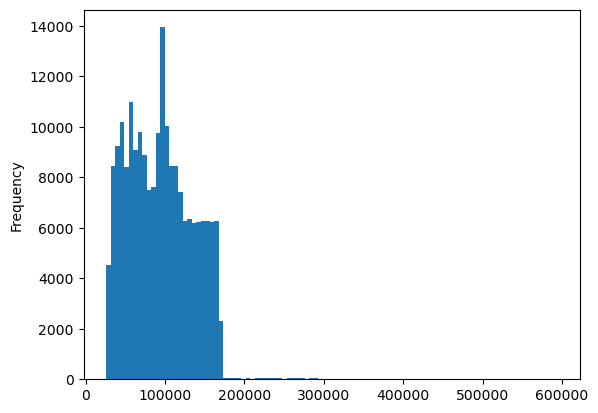

In [37]:
df_customers['income'].plot.hist(bins = 100)

<Axes: xlabel='income', ylabel='income'>

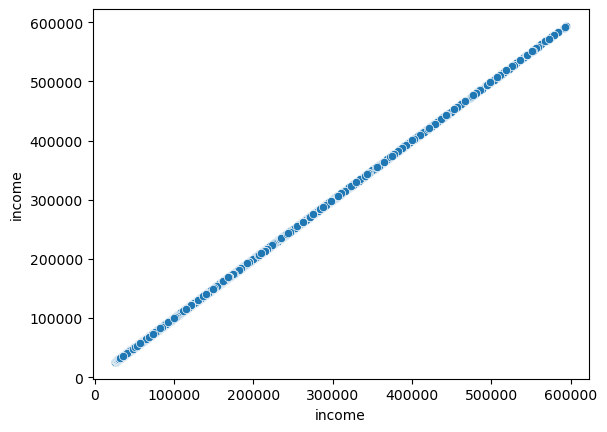

In [38]:
sns.scatterplot(x = 'income', y = 'income',data = df_customers)

In [39]:
# while there does appear to be a large difference in the max and min income
# the scatterplot has determined that no outliers are present for this column

In [40]:
# check for duplicates in user_id:
df_dup_user_id = df_customers[df_customers.duplicated()]
df_dup_user_id

,user_id,first_name,surname,gender,state,age,date_joined,num_of_dependents,fam_status,income


In [41]:
# there are no duplicates under user_id

In [42]:
# check for duplicate entries across ALL columns

df_dups = df_customers[df_customers.duplicated()]
df_dups

,user_id,first_name,surname,gender,state,age,date_joined,num_of_dependents,fam_status,income


In [43]:
# there are no fully duplicated entries, as it is possible for some users to have the same first_name and surname
# there is no need to check for duplicates across those two columns alone.
# rename column surname to last_name for consistency with first name column.

df_customers.rename(columns = {'surname' : 'last_name'}, inplace = True)

In [44]:
df_customers.head()

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,1/1/2017,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,1/1/2017,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,1/1/2017,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,1/1/2017,1,married,40374


In [45]:
# all columns are uniform, there are no duplicates or outliers

# export data set as .pkl
df_customers.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'wrangled_customers.pkl'))

In [46]:
# find column to merge:
pd.set_option('display.max_columns', None)
ords_prods_merge.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,_merge,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Regularly busy hours,Fewest orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Regularly busy,Slowest days,Regularly busy hours,Most orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Regularly busy hours,Fewest orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,both,Mid-range product,Least busy,Slowest days,Busiest hours,Fewest orders,10,New customer,6.367797,Low Spender,20.5,Non-frequent customer


In [47]:
# determine if _merge column is needed:

ords_prods_merge['_merge'].value_counts().sort_index()

_merge
left_only            0
right_only           0
both          32404859
Name: count, dtype: int64

In [48]:
# drop merge column from ords_prods_merge (not needed for analysis)

ords_prods_merge = ords_prods_merge.drop(columns=['_merge'])

In [49]:
# merge customer and orders_products data on user_id column

# practice merge
pd.merge(df_customers,ords_prods_merge, on = ['user_id'], indicator = True)

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Busiest hours,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404854,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,2859858,3,6,11,12.0,38750,11,0,"Protein Bar, Chocolate Pretzel",3,19,4.7,Low-range product,Regularly busy,Regularly busy,Busiest hours,Most orders,4,New customer,3.886667,Low Spender,12.0,Regular customer,both
32404855,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,2859858,3,6,11,12.0,39972,5,0,Chocolate Fudge High Protein Bar,3,19,4.0,Low-range product,Regularly busy,Regularly busy,Busiest hours,Most orders,4,New customer,3.886667,Low Spender,12.0,Regular customer,both
32404856,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,3209855,4,6,19,7.0,3198,2,0,Pumpkin Spice Latte Iced Coffee Pure Cold Brew...,26,7,4.7,Low-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,4,New customer,3.886667,Low Spender,12.0,Regular customer,both
32404857,80148,Cynthia,Noble,Female,New York,55,4/1/2020,1,married,57095,2859858,3,6,11,12.0,39069,2,0,Chocolate Coconut Almond Protein Bar,3,19,1.8,Low-range product,Regularly busy,Regularly busy,Busiest hours,Most orders,4,New customer,3.886667,Low Spender,12.0,Regular customer,both


In [50]:
# looks good, time to actually merge, then save new data set :)

customers_ords_prods = df_customers.merge(ords_prods_merge, on = ['user_id'], indicator = True)

In [51]:
customers_ords_prods.head()

,user_id,first_name,last_name,gender,state,age,date_joined,num_of_dependents,fam_status,income,order_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_label,busiest_day,busiest_days,busiest_hours,busiest_period_of_day,max_order,loyalty_flag,mean_prod_price,spender_type,median_since_last_order,customer_frequency_type,_merge
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2543867,5,1,9,30.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,1285508,7,5,15,11.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2578584,8,1,15,10.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Busiest hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,423547,2,2,9,14.0,38928,1,0,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Regularly busy,Regularly busy hours,Fewest orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,2524893,3,3,11,30.0,38928,1,1,0% Greek Strained Yogurt,120,16,12.6,Mid-range product,Regularly busy,Slowest days,Busiest hours,Most orders,8,New customer,7.988889,Low Spender,19.0,Regular customer,both


In [52]:
# export to .pkl

customers_ords_prods.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'combined_customer_order_product_data.pkl'))